# Drug Types Prediction Using Multinomial Logistic Regression
Created at 30/06/2023

#### Dataset
**`drug200.csv`: https://www.kaggle.com/datasets/prathamtripathi/drug-classification**

The data set contains individual health profiles including Age, Sex, BP, Cholesterol levels, and Na - K Ratio with the aim of predicting the most appropriate drug type for the respective patient.

### Import Library

In [5]:
install.packages("lmtest")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘doBy’, ‘RcppEigen’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [31]:
install.packages("aod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(lmtest)
library(car)
library(corrplot)

Loading required package: carData

corrplot 0.95 loaded



In [32]:
library(dplyr)
library(aod)

# Multinomial Classification

### Dataset

In [9]:
drug <- read.csv("drug200.csv")
drug <- drug[, -1]
head(drug)

,Sex,BP,Cholesterol,Na_to_K,Drug
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,F,HIGH,HIGH,25.355,DrugY
2,M,LOW,HIGH,13.093,drugC
3,M,LOW,HIGH,10.114,drugC
4,F,NORMAL,HIGH,7.798,drugX
5,F,LOW,HIGH,18.043,DrugY
6,F,NORMAL,HIGH,8.607,drugX


### Label Encoding

In [10]:
drug$Drug[drug$Drug == "drugB"] <- 1
drug$Drug[drug$Drug == "drugC"] <- 2
drug$Drug[drug$Drug == "drugX"] <- 3
drug$Drug[drug$Drug == "DrugY"] <- 4
drug$Drug <- as.integer(drug$Drug)
head(drug)

,Sex,BP,Cholesterol,Na_to_K,Drug
,<chr>,<chr>,<chr>,<dbl>,<int>
1,F,HIGH,HIGH,25.355,4
2,M,LOW,HIGH,13.093,2
3,M,LOW,HIGH,10.114,2
4,F,NORMAL,HIGH,7.798,3
5,F,LOW,HIGH,18.043,4
6,F,NORMAL,HIGH,8.607,3


In [11]:
drug$Sex[drug$Sex == "M"] <- 0
drug$Sex[drug$Sex == "F"] <- 1
drug$Sex <- as.integer(drug$Sex)


drug$BP[drug$BP == "LOW"] <- 0
drug$BP[drug$BP == "NORMAL"] <- 1
drug$BP[drug$BP == "HIGH"] <- 2
drug$BP <- as.integer(drug$BP)

drug$Cholesterol[drug$Cholesterol == "NORMAL"] <- 0
drug$Cholesterol[drug$Cholesterol == "HIGH"] <- 1
drug$Cholesterol <- as.integer(drug$Cholesterol)

head(drug)

,Sex,BP,Cholesterol,Na_to_K,Drug
,<int>,<int>,<int>,<dbl>,<int>
1,1,2,1,25.355,4
2,0,0,1,13.093,2
3,0,0,1,10.114,2
4,1,1,1,7.798,3
5,1,0,1,18.043,4
6,1,1,1,8.607,3


In [12]:
sum(is.na(drug))

[1] 0

In [13]:
range(drug$Na)

[1]  6.269 38.247

In [14]:
unique(drug$Cholesterol)

[1] 1 0

### Chi Square Correlation Test

In [15]:
chisq.test(drug$Sex, drug$Drug)


	Pearson's Chi-squared test

data:  drug$Sex and drug$Drug
X-squared = 2.1192, df = 4, p-value = 0.7138


In [16]:
chisq.test(drug$BP, drug$Drug)

Warning message in chisq.test(drug$BP, drug$Drug):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  drug$BP and drug$Drug
X-squared = 143.23, df = 8, p-value < 2.2e-16


In [17]:
chisq.test(drug$Cholesterol, drug$Drug)


	Pearson's Chi-squared test

data:  drug$Cholesterol and drug$Drug
X-squared = 19.61, df = 4, p-value = 0.0005963


The Chi-Squared independence test is conducted to test and see if a variable is independent of other variables or is dependent. The following are the results of the Chi-Squared independence test that has been carried out using the variables Sex, BP and Cholesterol. <br><br>The results of the Chi-Squared independence test show that only the variable **Sex** is independent because they have a p-value of more than 0.05.

### Pearson Correlation Test

In [18]:
print(cor.test(drug$Na_to_K, drug$Drug)$p.value)

      cor 
0.5891199 
[1] 4.478879e-20


Pearson correlation test was conducted to test and see the level of correlation between variables with numeric data types. Above is the correlation between the predictor variable Na - K Ratio on the response variable Drug. <br><br>The predictor variable has a p-value much smaller than 0.05. This means that the predictor variable has an effect on the response variable, Drug. The correlation coefficient value shows how much correlation occurs. The **Na - K Ratio** variable has a moderate correlation level (between 0.5 and 0.7).

### Multinomial Logistic Regression Model

In [19]:
model2 <- multinom(Drug ~ ., data = drug)
summary(model2)
coef(model2)

# weights:  30 (20 variable)
initial  value 321.887582 
iter  10 value 124.643143
iter  20 value 39.919958
iter  30 value 25.944673
iter  40 value 25.742793
iter  50 value 25.739680
final  value 25.739675 
converged


Call:
multinom(formula = Drug ~ ., data = drug)

Coefficients:
  (Intercept)         Sex         BP Cholesterol    Na_to_K
1    8.358006  -0.3311211   -5.42457  -0.3077395  0.2149282
2  455.065115  -2.6273571 -485.94121  89.3419875 -4.5761605
3  356.910411 -17.8951188 -282.15778 -84.9104476 14.8544498
4 -451.568654 -14.4935593 -280.00450 -70.1410683 69.0285903

Std. Errors:
  (Intercept)       Sex           BP Cholesterol     Na_to_K
1   0.4114248 0.7167796 8.228496e-01 0.693842239   0.1930325
2   7.2308639 7.2023851 1.001187e-18 7.230863769 102.3586456
3   6.9813095 6.6085085 4.132218e+01 7.231475270  96.8473261
4   6.8350992 6.9002428 1.475738e-01 0.003723011 100.0461524

Residual Deviance: 51.47935 
AIC: 91.47935 

,(Intercept),Sex,BP,Cholesterol,Na_to_K
1,8.358006,-0.3311211,-5.42457,-0.3077395,0.2149282
2,455.065115,-2.6273571,-485.94121,89.3419875,-4.5761605
3,356.910411,-17.8951188,-282.15778,-84.9104476,14.8544498
4,-451.568654,-14.4935593,-280.00450,-70.1410683,69.0285903


### Uji Multikolinearitas

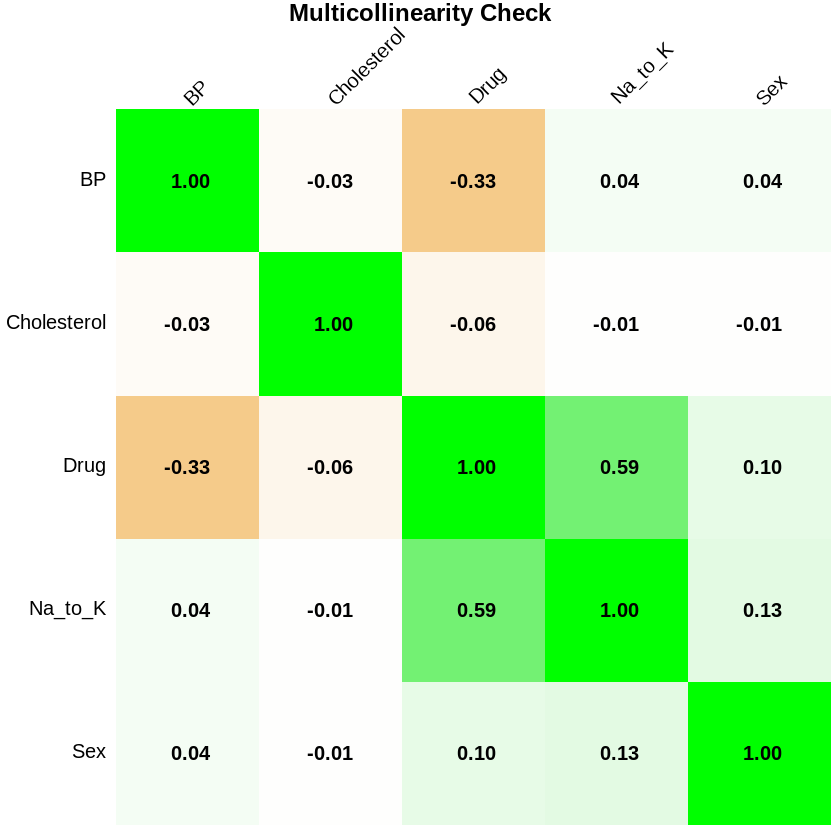

In [21]:
correlation <- select(drug, "Sex", "BP", "Cholesterol", "Na_to_K", "Drug")
correlation <- na.omit(correlation)

correlation <- round(cor(correlation), 2)
col <- colorRampPalette(c("#FFA500", "#F1B04C", "#FFFFFF", "#90EE90", "#00FF00"))

corrplot(correlation, method = "shade", shade.col = NA, tl.col = "black", tl.srt = 45,
        col = col(200), title = "Multicollinearity Check", mar=c(0,0,1,0),
          addCoef.col = "black", cl.pos = "n", order = "AOE")

All variables have Pearson correlation coefficient values close to 0, which means there is no multicollinearity of the four predictor variables.

### Likelihood Ratio Significance Test

In [22]:
null2 <- multinom(Drug ~ 1, data = drug)

# weights:  10 (4 variable)
initial  value 321.887582 
iter  10 value 272.930914
iter  10 value 272.930914
final  value 272.930914 
converged


In [29]:
lrtest(model2, null2)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20,-25.73968,NA,NA,NA
2,4,-272.93091,-16,494.3825,5.0984e-95


There is at least one independent variable that affects the dependent variable.

### Wald Significance Test

In [39]:
The variables that affect the Travel Insurance variable are **Age**, **Annual Income**, **Family Members**, **Frequent Flyer**, and **Ever Traveled Abroad**.z = summary(model2)$coefficients/summary(model2)$standard.errors
p = 2 * (1 - pnorm(abs(z), 0, 1))

data.frame(p)

,X.Intercept.,Sex,BP,Cholesterol,Na_to_K
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.644112405,4.327139e-11,0.6573828,0.2655237
2,0,0.715268267,0.000000e+00,0.0000000,0.9643408
3,0,0.006771231,8.596235e-12,0.0000000,0.8780986
4,0,0.035689984,0.000000e+00,0.0000000,0.4902146


For Drug B, the variable that affect the Drug variable is **BP**. For Drug C, the variables that affect the Drug variable are **BP** and **Cholesterol**. Finally for Drug X and Drug Y, the variables that affect the Drug variable are **Sex**, **BP** and **Cholesterol**. 

### Odd Ratio

In [40]:
odds_ratio = exp(coef(model2))
odds_ratio

,(Intercept),Sex,BP,Cholesterol,Na_to_K
1,4.264183e+03,7.181182e-01,4.406960e-03,7.351068e-01,1.239773e+00
2,4.288132e+197,7.226921e-02,9.086818e-212,6.320220e+38,1.029435e-02
3,1.009769e+155,1.691409e-08,2.886899e-123,1.330029e-37,2.826217e+06
4,7.695295e-197,5.076065e-07,2.486501e-122,3.452400e-31,9.522169e+29


**Sex** and **Cholesterol** are the independent variables that have the most influence on the likelihood of someone having Drug B. **Cholesterol** is the independent variable that has the most influence on the likelihood of someone having Drug C. Finally, **Na - K Ratio** is the independent variable that has the most influence on the likelihood of someone having Drug X and Drug Y.